In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [ ]:
players_df= pd.read_csv('./players.csv')
players_values_df= pd.read_csv('./players_values.csv')
transfers_df = pd.read_csv('./transfers.csv')

#Análise 1: Distribuição do Valor de Mercado dos Jogadores


####Distribuição do Mario Valor de mercado dos Jogadores

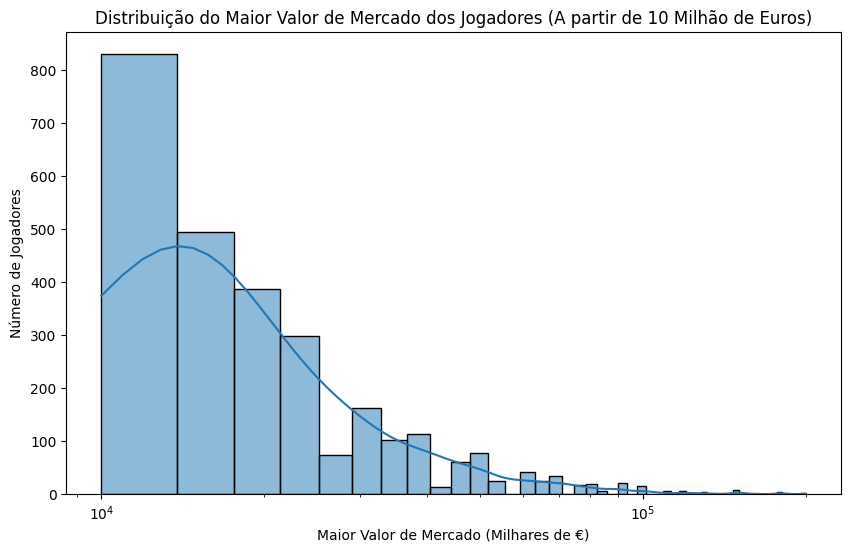

In [ ]:
# Remover valores ausentes e zeros e filtrar para valores a partir de 1 milhão de euros
filtered_df = players_df[(players_df['highest_market_value_in_eur'] > 0) &
                         (players_df['highest_market_value_in_eur'] >= 10*1e6)].copy()

# Converter valores para milhares de euros
filtered_df.loc[:, 'market_value_in_thousand_eur'] = filtered_df['highest_market_value_in_eur'] / 1e3

# Plotando o histograma com escala logarítmica no eixo X
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['market_value_in_thousand_eur'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribuição do Maior Valor de Mercado dos Jogadores (A partir de 10 Milhão de Euros)')
plt.xlabel('Maior Valor de Mercado (Milhares de €)')
plt.ylabel('Número de Jogadores')
plt.show()

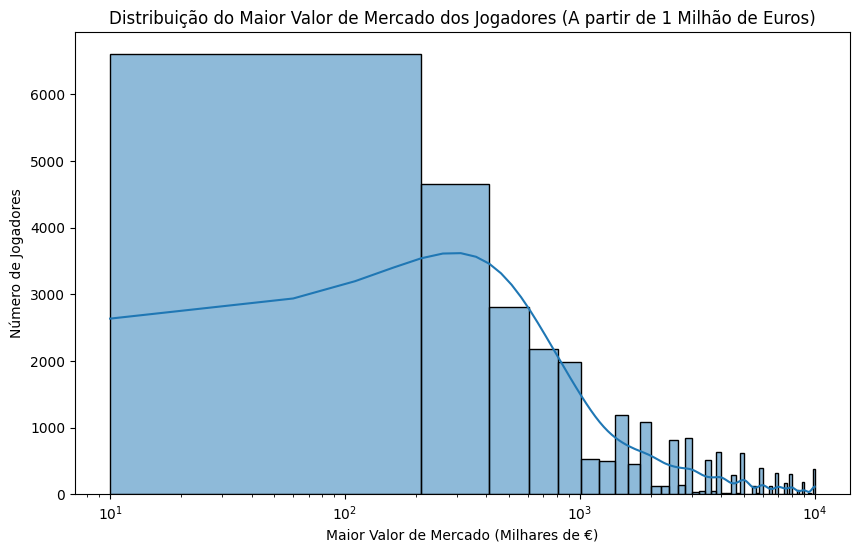

In [ ]:

# Remover valores ausentes e zeros e filtrar para valores a partir de 1 milhão de euros
filtered_df = players_df[(players_df['highest_market_value_in_eur'] > 0) &
                         (players_df['highest_market_value_in_eur'] <= 10*1e6)].copy()

# Converter valores para milhares de euros
filtered_df.loc[:, 'market_value_in_thousand_eur'] = filtered_df['highest_market_value_in_eur'] / 1e3

# Plotando o histograma com escala logarítmica no eixo X
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['market_value_in_thousand_eur'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribuição do Maior Valor de Mercado dos Jogadores (A partir de 1 Milhão de Euros)')
plt.xlabel('Maior Valor de Mercado (Milhares de €)')
plt.ylabel('Número de Jogadores')
plt.show()

###Porcentagens da distribuição

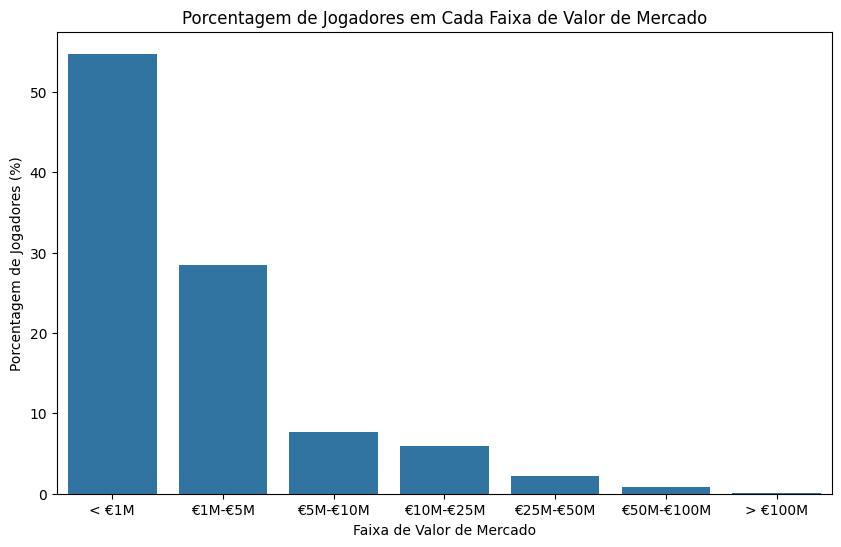

Percentis do Maior Valor de Mercado dos Jogadores:
   Percentil  Valor de Mercado (€)
0         25              250000.0
1         50              800000.0
2         75             2800000.0
3         90             8500000.0
4         95            17000000.0
5         99            50000000.0
Porcentagem de jogadores com valor de mercado ≥ €1,000,000: 45.28%
Porcentagem de jogadores com valor de mercado ≥ €5,000,000: 16.89%
Porcentagem de jogadores com valor de mercado ≥ €10,000,000: 9.22%
Porcentagem de jogadores com valor de mercado ≥ €25,000,000: 3.24%
Porcentagem de jogadores com valor de mercado ≥ €50,000,000: 1.00%
Porcentagem de jogadores com valor de mercado ≥ €100,000,000: 0.15%


In [ ]:
# Remover valores ausentes e zeros
market_values = players_df['highest_market_value_in_eur'].dropna()
market_values = market_values[market_values > 0]

# Calcular percentis-chave
percentiles = [25, 50, 75, 90, 95, 99]
values = np.percentile(market_values, percentiles)

# Criar um DataFrame para exibir os percentis
percentiles_df = pd.DataFrame({'Percentil': percentiles, 'Valor de Mercado (€)': values})

# Definir as faixas de valor de mercado
bins = [0, 1e6, 5e6, 10e6, 25e6, 50e6, 100e6, np.inf]
labels = ['< €1M', '€1M-€5M', '€5M-€10M', '€10M-€25M', '€25M-€50M', '€50M-€100M', '> €100M']

# Criar uma nova coluna com a faixa de valor
players_df['faixa_valor'] = pd.cut(players_df['highest_market_value_in_eur'], bins=bins, labels=labels, right=False)

# Calcular a porcentagem de jogadores em cada faixa
faixa_counts = players_df['faixa_valor'].value_counts(normalize=True) * 100
faixa_counts = faixa_counts.reindex(labels)  # Garantir a ordem correta

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=faixa_counts.index, y=faixa_counts.values)
plt.xlabel('Faixa de Valor de Mercado')
plt.ylabel('Porcentagem de Jogadores (%)')
plt.title('Porcentagem de Jogadores em Cada Faixa de Valor de Mercado')
plt.show()
print("Percentis do Maior Valor de Mercado dos Jogadores:")
print(percentiles_df)
thresholds = [1e6, 5e6, 10e6, 25e6, 50e6, 100e6]
for threshold in thresholds:
    percentage = (market_values >= threshold).mean() * 100
    print(f"Porcentagem de jogadores com valor de mercado ≥ €{threshold:,.0f}: {percentage:.2f}%")

#Análise 2:  Evolução do Valor de Mercado de um Jogador ao Longo do Tempo


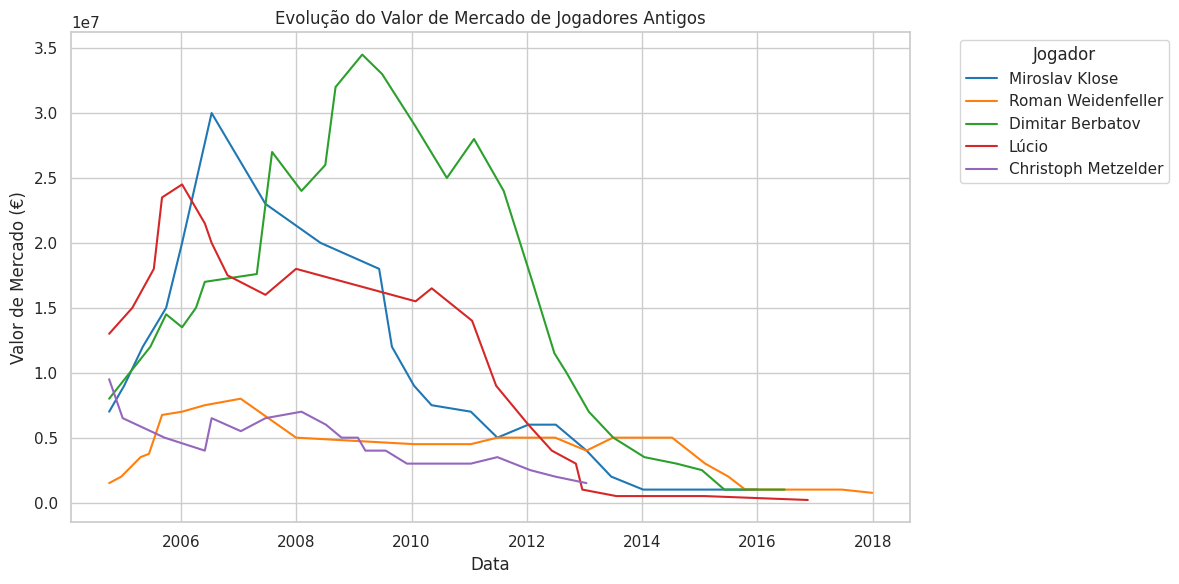

In [ ]:
# Converter a coluna 'date' para datetime
players_values_df['date'] = pd.to_datetime(players_values_df['date'])

# Selecionar jogadores antigos (substitua pelos IDs dos jogadores que deseja analisar)
player_ids = [10, 26, 65, 77, 123]  # Exemplo de IDs de jogadores antigos

# Filtrar os dados para os jogadores específicos e fazer uma cópia
player_values = players_values_df[players_values_df['player_id'].isin(player_ids)].copy()

# Obter os nomes dos jogadores
player_names = players_df.set_index('player_id')['name'].to_dict()

# Mapear o nome do jogador na tabela de valores
player_values['name'] = player_values['player_id'].map(player_names)

# Ordenar por data
player_values = player_values.sort_values('date')

# Configurar o estilo do Seaborn
sns.set(style='whitegrid')

# Plotar o gráfico
plt.figure(figsize=(12,6))

# Plotar linhas para cada jogador
sns.lineplot(x='date', y='market_value_in_eur', hue='name', data=player_values, palette='tab10')

# Personalizar o gráfico
plt.title('Evolução do Valor de Mercado de Jogadores Antigos')
plt.xlabel('Data')
plt.ylabel('Valor de Mercado (€)')
plt.legend(title='Jogador', bbox_to_anchor=(1.05, 1), loc=2)  # Posiciona a legenda fora do gráfico
plt.tight_layout()  # Ajusta o layout para evitar corte de elementos
plt.show()

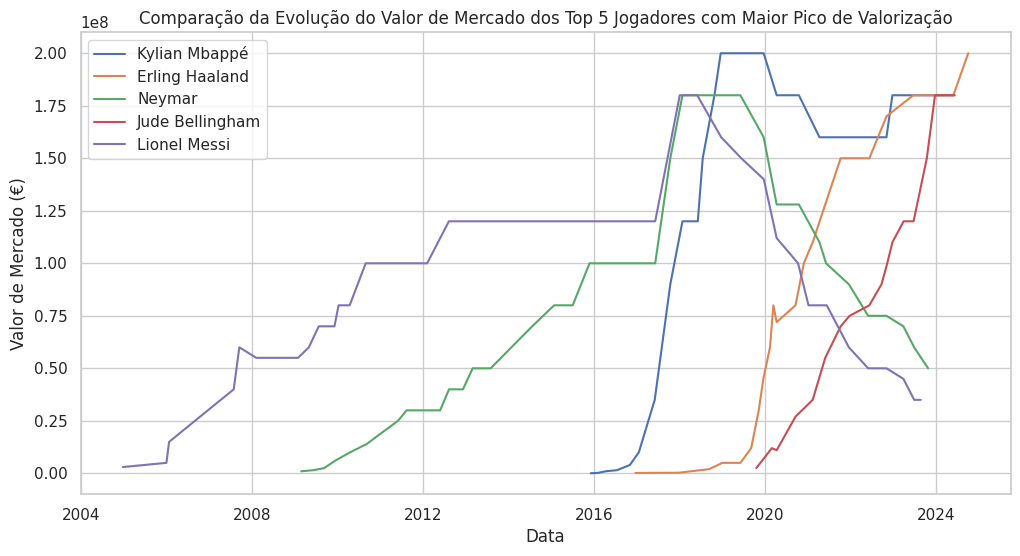

In [ ]:
# Mesclar os DataFrames para obter os nomes dos jogadores
merged_df = players_values_df.merge(players_df[['player_id', 'name']], on='player_id', how='left')
def plot_top_players_with_highest_value_peak(top_n=5):
    plt.figure(figsize=(12, 6))

    # Calcular o pico de valorização para cada jogador
    players_peak_values = (
        merged_df.groupby('player_id')['market_value_in_eur']
        .apply(lambda x: x.max() - x.min())
        .nlargest(top_n)
    )
    top_player_ids = players_peak_values.index.tolist()

    for player_id in top_player_ids:
        # Obter os dados do jogador
        player_data = merged_df[merged_df['player_id'] == player_id].sort_values('date')

        if player_data.empty:
            print(f"Sem dados de valor de mercado para o jogador com ID {player_id}.")
            continue

        player_name_full = player_data['name'].iloc[0]

        # Plotar a evolução do valor de mercado
        sns.lineplot(x='date', y='market_value_in_eur', data=player_data, label=player_name_full)

    plt.title(f'Comparação da Evolução do Valor de Mercado dos Top {top_n} Jogadores com Maior Pico de Valorização')
    plt.xlabel('Data')
    plt.ylabel('Valor de Mercado (€)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de uso:
plot_top_players_with_highest_value_peak(top_n=5)

#Análise 3: Tempo Decorrido até a Melhor Transferência


In [ ]:
# Converter 'transfer_date' para datetime
transfers_df['transfer_date'] = pd.to_datetime(transfers_df['transfer_date'])

# Criar o DataFrame com a primeira transferência de cada jogador
first_transfer_df = transfers_df.sort_values(by='transfer_date').drop_duplicates(subset='player_id', keep='first')
first_transfer_df = first_transfer_df[['player_id', 'transfer_date']].rename(columns={'transfer_date': 'first_transfer_date'})

# Criar o DataFrame com a transferência de maior valor de cada jogador
# Precisamos garantir que 'estimated_fee' esteja disponível
# Vamos considerar 'transfer_fee' ou 'market_value_in_eur' como proxy para o valor da transferência

# Preencher valores ausentes em 'transfer_fee' e 'market_value_in_eur' com zero
transfers_df['transfer_fee'] = transfers_df['transfer_fee'].fillna(0)
transfers_df['market_value_in_eur'] = transfers_df['market_value_in_eur'].fillna(0)

# Calcular 'estimated_fee' como o máximo entre 'transfer_fee' e 'market_value_in_eur'
transfers_df['estimated_fee'] = transfers_df[['transfer_fee', 'market_value_in_eur']].max(axis=1)

# Criar o DataFrame com a transferência de maior valor de cada jogador
highest_transfer_df = transfers_df.sort_values(by='estimated_fee', ascending=False).drop_duplicates(subset='player_id', keep='first')
highest_transfer_df = highest_transfer_df[['player_id', 'transfer_date', 'estimated_fee']].rename(columns={'transfer_date': 'highest_transfer_date'})

# Mesclar os DataFrames para obter as datas da primeira transferência e da transferência mais valiosa
merged_transfers = pd.merge(first_transfer_df, highest_transfer_df, on='player_id')

# Calcular o tempo decorrido em dias entre as transferências
merged_transfers['time_elapsed_days'] = (merged_transfers['highest_transfer_date'] - merged_transfers['first_transfer_date']).dt.days

# Calcular o tempo decorrido em anos
merged_transfers['time_elapsed_years'] = merged_transfers['time_elapsed_days'] / 365.25

# Adicionar informações dos jogadores (nome, posição, idade, etc.)
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
players_df['age_at_first_transfer'] = (merged_transfers['first_transfer_date'] - players_df['date_of_birth']).dt.days / 365.25

merged_transfers = pd.merge(merged_transfers, players_df[['player_id', 'name', 'position', 'age_at_first_transfer']], on='player_id')

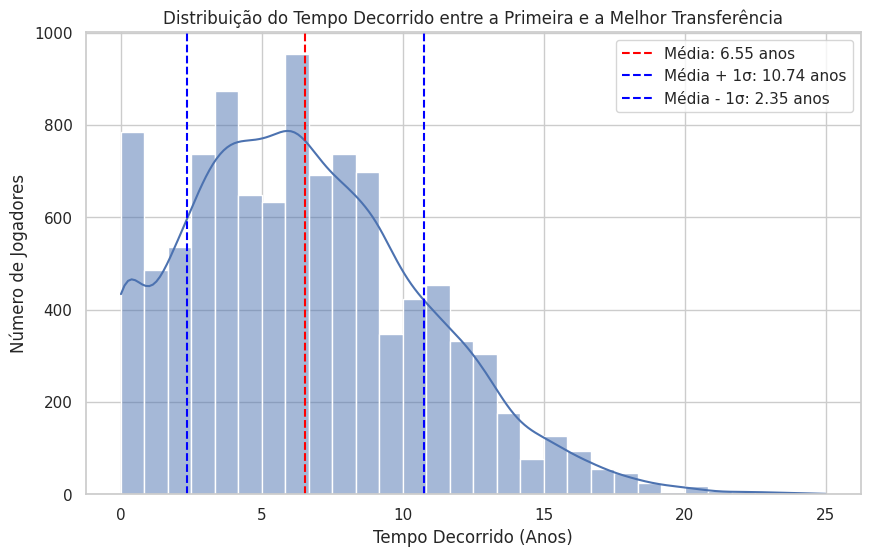

Média do tempo decorrido: 6.55 anos
Desvio padrão do tempo decorrido: 4.20 anos
Tempo mediano decorrido: 6.05 anos


In [ ]:
# Calcular média e desvio padrão do tempo decorrido
mean_time_elapsed = merged_transfers['time_elapsed_years'].mean()
std_time_elapsed = merged_transfers['time_elapsed_years'].std()

# Plotar histograma do tempo decorrido em anos com linhas de média e desvio padrão
plt.figure(figsize=(10, 6))
sns.histplot(merged_transfers['time_elapsed_years'], bins=30, kde=True)
plt.axvline(mean_time_elapsed, color='red', linestyle='--', label=f'Média: {mean_time_elapsed:.2f} anos')
plt.axvline(mean_time_elapsed + std_time_elapsed, color='blue', linestyle='--', label=f'Média + 1σ: {mean_time_elapsed + std_time_elapsed:.2f} anos')
plt.axvline(mean_time_elapsed - std_time_elapsed, color='blue', linestyle='--', label=f'Média - 1σ: {mean_time_elapsed - std_time_elapsed:.2f} anos')
plt.title('Distribuição do Tempo Decorrido entre a Primeira e a Melhor Transferência')
plt.xlabel('Tempo Decorrido (Anos)')
plt.ylabel('Número de Jogadores')
plt.legend()
plt.show()

# Exibir os valores calculados
print(f"Média do tempo decorrido: {mean_time_elapsed:.2f} anos")
print(f"Desvio padrão do tempo decorrido: {std_time_elapsed:.2f} anos")
# Calcular a média do tempo decorrido
median_time_elapsed = merged_transfers['time_elapsed_years'].median()

print(f"Tempo mediano decorrido: {median_time_elapsed:.2f} anos")

In [ ]:
# Definir um limiar, por exemplo, menos de 2 anos
rapid_ascension = merged_transfers[merged_transfers['time_elapsed_years'] <= 2]

# Ordenar pelos valores mais altos de transferência
rapid_ascension = rapid_ascension.sort_values(by='estimated_fee', ascending=False)

# Exibir os top 10 jogadores
print("Jogadores que alcançaram sua melhor transferência em menos de 2 anos:")
print(rapid_ascension[['name', 'position', 'estimated_fee', 'time_elapsed_years']].head(10))

Jogadores que alcançaram sua melhor transferência em menos de 2 anos:
                 name  position  estimated_fee  time_elapsed_years
6486          Rodrygo    Attack     45000000.0            1.943874
5961  Vinicius Junior    Attack     45000000.0            1.177276
3130        Luke Shaw  Defender     37500000.0            1.661875
9925   Yankuba Minteh    Attack     35000000.0            1.867214
2582       Marquinhos  Defender     31400000.0            1.546886
7419          Reinier  Midfield     30000000.0            1.051335
9512    Carlos Baleba  Midfield     27000000.0            1.620808
9975   Luis Guilherme    Attack     24000000.0            1.497604
6734            Pedri  Midfield     23000000.0            1.286790
9448     Abakar Sylla  Defender     20000000.0            1.787817


###Distribuição do auge

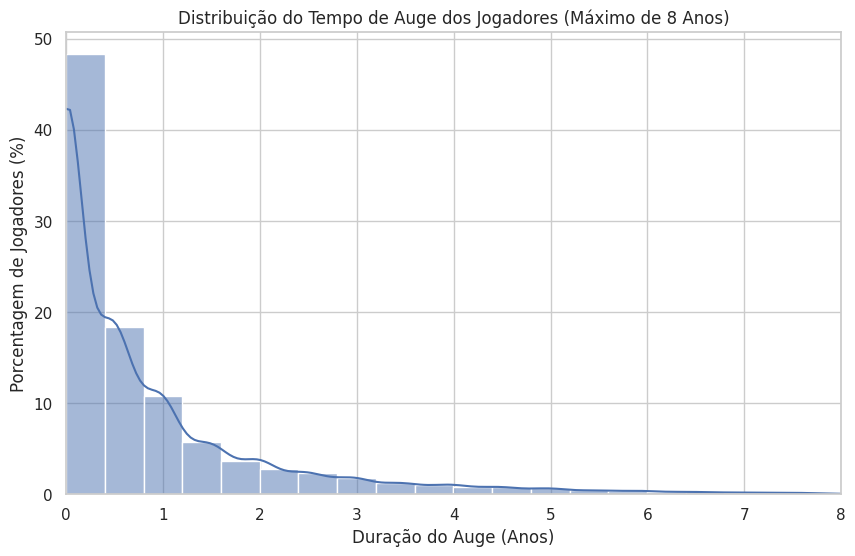

Estatísticas sobre a duração do auge dos jogadores (em anos, até 8 anos):
count    30738.000000
mean         0.843653
std          1.265307
min          0.000000
25%          0.000000
50%          0.427105
75%          1.043121
max          7.994524
Name: peak_duration_years, dtype: float64


In [ ]:
players_values_df['date'] = pd.to_datetime(players_values_df['date'])

# Função para calcular o tempo de auge de um jogador
def calculate_peak_duration(player_id):
    # Filtrar os dados do jogador
    player_data = players_values_df[players_values_df['player_id'] == player_id].sort_values(by='date')

    # Identificar o valor máximo de mercado do jogador
    max_value = player_data['market_value_in_eur'].max()

    # Definir o limite de 90% do valor máximo para considerar o auge
    peak_threshold = 0.9 * max_value

    # Filtrar o período em que o jogador esteve no auge
    peak_data = player_data[player_data['market_value_in_eur'] >= peak_threshold]

    # Verificar se o jogador teve um período de auge
    if peak_data.empty:
        return None  # Sem período de auge

    # Calcular a duração do auge em anos
    peak_duration = (peak_data['date'].max() - peak_data['date'].min()).days / 365.25
    return peak_duration

# Aplicar a função para cada jogador
players_peak_durations = []
for player_id in players_values_df['player_id'].unique():
    duration = calculate_peak_duration(player_id)
    if duration is not None:
        players_peak_durations.append(duration)

# Converter a lista para um DataFrame para análise
peak_durations_df = pd.DataFrame(players_peak_durations, columns=['peak_duration_years'])

# Filtrar para duração do auge até 8 anos
peak_durations_filtered = peak_durations_df[peak_durations_df['peak_duration_years'] <= 8]

# Calcular a distribuição em porcentagens
total_players = len(peak_durations_filtered)
peak_durations_percent = peak_durations_filtered['peak_duration_years'].value_counts(normalize=True) * 100

# Plotar a distribuição do tempo de auge dos jogadores com limite de 8 anos
plt.figure(figsize=(10, 6))
sns.histplot(peak_durations_filtered['peak_duration_years'], bins=20, kde=True, stat='percent')
plt.title('Distribuição do Tempo de Auge dos Jogadores (Máximo de 8 Anos)')
plt.xlabel('Duração do Auge (Anos)')
plt.ylabel('Porcentagem de Jogadores (%)')
plt.xlim(0, 8)
plt.show()

# Exibir estatísticas básicas sobre o tempo de auge dos jogadores
print("Estatísticas sobre a duração do auge dos jogadores (em anos, até 8 anos):")
print(peak_durations_filtered['peak_duration_years'].describe())

###Modelo de previsão

####Ajustando dataframes

Existem 2 jogadores em transfer_edges que não estão em player_nodes.
Desempenho no conjunto de validação:
MAE: 854.18 dias
RMSE: 1106.54 dias

Desempenho no conjunto de teste:
MAE: 875.95 dias
RMSE: 1173.91 dias

Exemplos de previsões no conjunto de teste:
      Real  Previsto  Erro Absoluto
8046   697   1480.65         783.65
7808  2922   1725.93        1196.07
3658  2495   1233.61        1261.39
318   6040   2476.90        3563.10
3014  1868   2529.90         661.90
1078  2753   2347.37         405.63
8946   515    851.65         336.65
3880  2203   2262.51          59.51
5651  2924   3661.34         737.34
7847  1826   1709.30         116.70


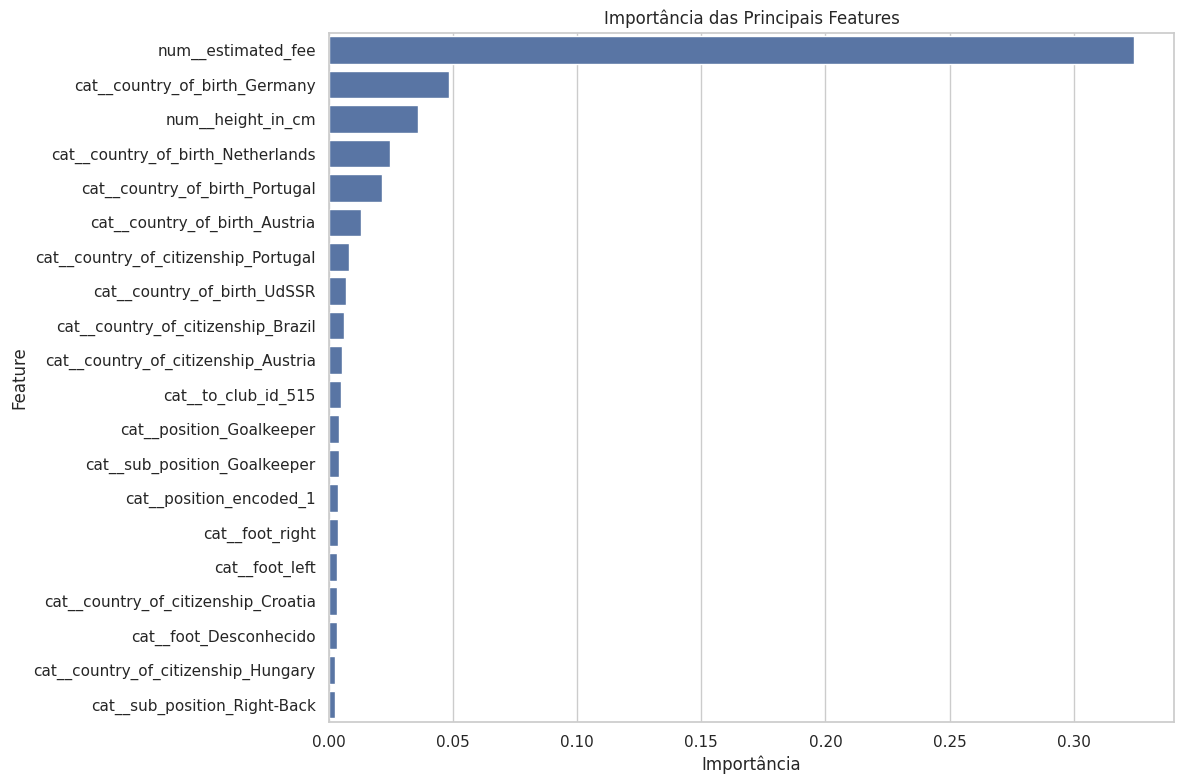

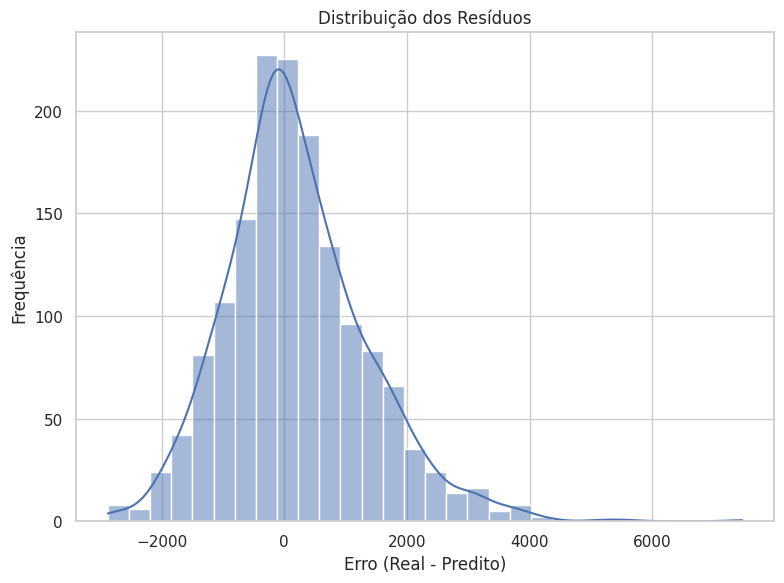

In [ ]:
import pandas as pd
import numpy as np
import torch
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
club_df = pd.read_csv('./clubs.csv')
players_df = pd.read_csv('./players.csv')
transfers_df = pd.read_csv('./transfers.csv')
players_values_df = pd.read_csv('./players_values_transformed.csv')

# Codificar as posições dos jogadores
players_df['position_encoded'], uniques = pd.factorize(players_df['position'].astype(str))

# Converter date_of_birth para datetime
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'], errors='coerce')

# Remover linhas com date_of_birth nulo
players_df = players_df[players_df['date_of_birth'].notna()].copy()

# Preencher valores nulos em height_in_cm com a média
players_df['height_in_cm'] = players_df['height_in_cm'].fillna(players_df['height_in_cm'].mean())

# Preencher valores nulos em 'country_of_birth' e 'city_of_birth' com 'Desconhecido'
players_df['country_of_birth'] = players_df['country_of_birth'].fillna('Desconhecido')
players_df['city_of_birth'] = players_df['city_of_birth'].fillna('Desconhecido')

# Novas Features: Preencher valores nulos em 'country_of_citizenship', 'sub_position', 'foot'
players_df['country_of_citizenship'] = players_df['country_of_citizenship'].fillna('Desconhecido')
players_df['sub_position'] = players_df['sub_position'].fillna('Desconhecido')
players_df['foot'] = players_df['foot'].fillna('Desconhecido')

# DataFrame com as informações dos jogadores incluindo as novas features
player_nodes = players_df[['player_id', 'name', 'last_season', 'country_of_birth', 'city_of_birth',
                           'country_of_citizenship', 'date_of_birth', 'position', 'position_encoded',
                           'sub_position', 'foot', 'height_in_cm']]

# Processamento do DataFrame de transferências
transfers_df['transfer_date'] = pd.to_datetime(transfers_df['transfer_date'])
transfers_df['transfer_fee'] = transfers_df['transfer_fee'].fillna(0)
transfers_df['transfer_fee'] = pd.to_numeric(transfers_df['transfer_fee'], errors='coerce').fillna(0)

transfer_edges = transfers_df[['from_club_id', 'to_club_id', 'from_club_name', 'to_club_name',
                               'player_id', 'transfer_date', 'transfer_fee', "market_value_in_eur"]]

# Verificar jogadores ausentes
missing_players = set(transfer_edges['player_id']) - set(player_nodes['player_id'])
if missing_players:
    print(f"Existem {len(missing_players)} jogadores em transfer_edges que não estão em player_nodes.")

# Excluir transferências que envolvem jogadores ausentes
transfer_edges_filtered = transfer_edges[~transfer_edges['player_id'].isin(missing_players)].copy()

# Converter tipos e criar 'estimated_fee'
transfer_edges_filtered['transfer_fee'] = pd.to_numeric(transfer_edges_filtered['transfer_fee'], errors='coerce').fillna(0)
transfer_edges_filtered['market_value_in_eur'] = pd.to_numeric(transfer_edges_filtered['market_value_in_eur'], errors='coerce').fillna(0)

transfer_edges_filtered['estimated_fee'] = np.where(
    transfer_edges_filtered['transfer_fee'] > 0,
    transfer_edges_filtered['transfer_fee'],
    transfer_edges_filtered['market_value_in_eur']
)

# Remover as colunas 'transfer_fee' e 'market_value_in_eur'
transfer_edges_filtered = transfer_edges_filtered.drop(['transfer_fee', 'market_value_in_eur'], axis=1)

# DataFrames com a primeira e a transferência mais valiosa de cada jogador
first_transfer_df = transfer_edges_filtered.sort_values(by='transfer_date').drop_duplicates(subset='player_id', keep='first')
first_transfer_df = first_transfer_df.drop(['from_club_name', 'to_club_name'], axis=1)

highest_valued_transfer_df = transfer_edges_filtered.sort_values(by='estimated_fee', ascending=False).drop_duplicates(subset='player_id', keep='first')
highest_valued_transfer_df = highest_valued_transfer_df.drop(['from_club_name', 'to_club_name'], axis=1)

# Converter transfer_date para datetime
first_transfer_df['transfer_date'] = pd.to_datetime(first_transfer_df['transfer_date'])
highest_valued_transfer_df['transfer_date'] = pd.to_datetime(highest_valued_transfer_df['transfer_date'])

# Renomear coluna para facilitar o merge
first_transfer_df = first_transfer_df.rename(columns={'transfer_date': 'first_transfer_date'})

# Juntar os DataFrames com base no player_id
merged_df = highest_valued_transfer_df.merge(
    first_transfer_df[['player_id', 'first_transfer_date']],
    on='player_id'
)

# Calcular o tempo decorrido em dias
merged_df['time_elapsed'] = (merged_df['transfer_date'] - merged_df['first_transfer_date']).dt.days

# Remover a coluna transfer_date
merged_df = merged_df.drop(columns=['transfer_date'])

# Novo passo: Juntar com player_nodes para incluir as features adicionais
merged_df = merged_df.merge(
    player_nodes[['player_id', 'height_in_cm', 'position_encoded', 'country_of_birth', 'city_of_birth',
                  'country_of_citizenship', 'sub_position', 'position', 'foot']],
    on='player_id'
)

# Verificação e Preenchimento de Valores Nulos nas Novas Features
# Preencher valores nulos em 'height_in_cm' com a média
merged_df['height_in_cm'] = merged_df['height_in_cm'].fillna(merged_df['height_in_cm'].mean())

# Preencher valores nulos em variáveis categóricas com 'Desconhecido'
categorical_cols = ['country_of_birth', 'city_of_birth', 'country_of_citizenship', 'sub_position', 'position', 'foot']
for col in categorical_cols:
    merged_df[col] = merged_df[col].fillna('Desconhecido')

# Selecionar as colunas de interesse, incluindo as novas features
features = ['from_club_id', 'to_club_id', 'estimated_fee', 'height_in_cm', 'position_encoded',
            'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'sub_position', 'position', 'foot']
target = 'time_elapsed'

# Separar X e y
X = merged_df[features]
y = merged_df[target]

# Definir os pré-processadores para colunas numéricas e categóricas
numeric_features = ['estimated_fee', 'height_in_cm']
numeric_transformer = StandardScaler()

categorical_features = ['from_club_id', 'to_club_id', 'position_encoded',
                        'country_of_birth', 'city_of_birth', 'country_of_citizenship',
                        'sub_position', 'position', 'foot']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar o pré-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
)

# Criar o pipeline com o pré-processador e o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Dividir os dados em treino, validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42  # 0.1765 x 0.85 ≈ 0.15
)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred_val = model.predict(X_val)

# Avaliar o desempenho no conjunto de validação
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"Desempenho no conjunto de validação:")
print(f"MAE: {mae_val:.2f} dias")
print(f"RMSE: {rmse_val:.2f} dias")

# Fazer previsões no conjunto de teste
y_pred_test = model.predict(X_test)

# Avaliar o desempenho no conjunto de teste
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nDesempenho no conjunto de teste:")
print(f"MAE: {mae_test:.2f} dias")
print(f"RMSE: {rmse_test:.2f} dias")

# Exemplo de interpretação
print("\nExemplos de previsões no conjunto de teste:")
results = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred_test,
    'Erro Absoluto': np.abs(y_test - y_pred_test)
})
print(results.head(10))

# =====================
# Adicionar visualizações
# =====================

# 1. Importância das Features
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Criar um DataFrame com as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar as importâncias
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature')
plt.title('Importância das Principais Features')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Resíduos (Erros)
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro (Real - Predito)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()



